## In this notebook: ANN classifer model using both good and nosy model-state data.


Potential Issues:
    
For the first layer, the model has an accuracy of 1. But then when presented with different kinds of noisy samples, it predicts really bad. This model was trained with model-state data where these different kinds of noise are present, so it should predict them well. 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras import datasets
import tensorflow
from tensorflow.keras import datasets
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, GlobalAveragePooling2D, Softmax
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

In [2]:
good_data=pd.read_csv("first_layer_dense.csv", header=None)
good_data2=pd.read_csv("second_layer_dense.csv", header=None)
# 4 different kinds of noise.
noisy=pd.read_csv("noisy_samples_first_layer_32_new.csv", header=None)
noisy2=pd.read_csv("noisy_samples_second_layer_10_new.csv", header=None)

In [3]:
good_data.shape,noisy.shape

((2400, 33), (1400, 33))

In [4]:
good_data2.shape,noisy2.shape

((2400, 11), (1400, 11))

In [5]:
good_data = good_data.drop(columns=32)
good_data2 = good_data2.drop(columns=10)
noisy = noisy.drop(columns=32)
noisy2 = noisy2.drop(columns=10)

#### Adding label 

In [6]:
label_0=np.repeat(0, good_data.shape[0])
label_1=np.repeat(1, noisy.shape[0])
label_0_second_layer=np.repeat(0, good_data2.shape[0])
label_1_second_layer=np.repeat(1, noisy2.shape[0])

In [7]:
good_data.insert(loc=0, column='label', value=label_0)
noisy.insert(loc=0, column='label', value=label_1)

In [8]:
noisy2.insert(loc=0, column='label', value=label_1_second_layer)
good_data2.insert(loc=0, column='label', value=label_0_second_layer)

In [9]:
good_data.head(2)

,label,0,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
0,0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,4.43591,9.417781,...,-0.0,-0.000000,0.371734,-0.0,2.186035,2.058924,-0.0,-0.0,2.713118,6.667173
1,0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,5.014995,-0.00000,3.974792,...,-0.0,12.779865,-0.000000,-0.0,9.415463,0.058519,-0.0,-0.0,3.334485,4.764035


In [10]:
noisy.head(2)

,label,0,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
0,1,0.0,21.454794,0.0,21.780441,22.364273,21.798470,22.979643,17.767950,20.662392,...,0.0,22.422182,0.0,0.0,0.0,18.037153,18.577494,0.0,22.586908,0.0
1,1,0.0,21.240885,0.0,21.112010,21.556204,20.823935,22.079000,16.665604,19.847033,...,0.0,21.727512,0.0,0.0,0.0,17.247578,17.685488,0.0,22.209415,0.0


In [11]:
#joining good and noisy data
data_first_layer=pd.concat([good_data,noisy])
data_second_layer=pd.concat([good_data2,noisy2])

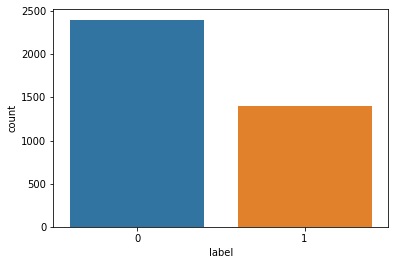

In [12]:
sns.countplot(data_first_layer['label'],label="Count")

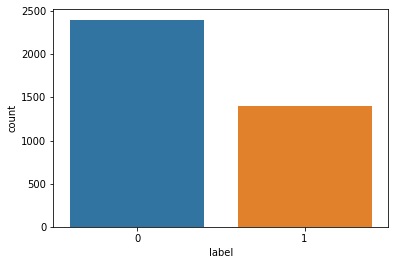

In [13]:
sns.countplot(data_second_layer['label'],label="Count")

In [14]:
df_x_first_layer=data_first_layer.iloc[:,1:]
df_y_first_layer=data_first_layer.iloc[:,0]
df_y_first_layer.value_counts().sort_index()

df_x_second_layer=data_second_layer.iloc[:,1:]
df_y_second_layer=data_second_layer.iloc[:,0]
df_y_second_layer.value_counts().sort_index()

#Split the dataset

#First layer
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_x_first_layer, df_y_first_layer, test_size=0.2, random_state=0,shuffle=True)
#Second layer
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_x_second_layer, df_y_second_layer, test_size=0.2, random_state=0,shuffle=True)


In [15]:
X_train1.shape,X_train2.shape,

((3040, 32), (3040, 10))

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
model = Sequential()
model.add(Dense(X_train1.shape[0] ,input_shape=(32,), activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(X_train1.shape[0] ,input_shape=(32,), activation='relu'))
#model.add(Dropout(0.3))
#model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder().fit(y_train1)
classes = label_encoder.classes_
from sklearn.utils import compute_class_weight
classWeight = compute_class_weight('balanced',classes,y_train1) 
classWeight = dict(enumerate(classWeight))
#model.fit(X_train, y_train, batch_size = batch_size, nb_epoch = nb_epochs, show_accuracy = True, verbose = 2, validation_data = (X_test, y_test), class_weight=classWeight)

In [18]:
print("[INFO] training network...")
sgd = SGD(0.000001,decay=1e-6, momentum=0.9, nesterov=True)
#sgd = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy", optimizer='adam',
metrics=["accuracy"])

[INFO] training network...


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3040)              100320    
                                                                 
 dropout (Dropout)           (None, 3040)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3041      
                                                                 
Total params: 103,361
Trainable params: 103,361
Non-trainable params: 0
_________________________________________________________________


### First Layer

In [114]:
X_train1.shape,y_train1.shape,X_test1.shape, y_test1.shape

((3040, 32), (3040,), (760, 32), (760,))

In [115]:
model.compile(loss="binary_crossentropy", optimizer='adam',
metrics=["accuracy"])

In [117]:
model.fit(X_train1, y_train1, validation_data=(X_test1, y_test1),epochs=16,class_weight=classWeight)

Epoch 1/16
95/95 [==============================] - 1s 9ms/step - loss: 0.0166 - accuracy: 0.9941 - val_loss: 5.7233e-07 - val_accuracy: 1.0000
Epoch 2/16
95/95 [==============================] - 1s 7ms/step - loss: 1.4370e-06 - accuracy: 1.0000 - val_loss: 2.4979e-07 - val_accuracy: 1.0000
Epoch 3/16
95/95 [==============================] - 1s 7ms/step - loss: 8.3505e-07 - accuracy: 1.0000 - val_loss: 9.9239e-08 - val_accuracy: 1.0000
Epoch 4/16
95/95 [==============================] - 1s 8ms/step - loss: 3.2594e-07 - accuracy: 1.0000 - val_loss: 5.7140e-08 - val_accuracy: 1.0000
Epoch 5/16
95/95 [==============================] - 1s 9ms/step - loss: 1.3288e-07 - accuracy: 1.0000 - val_loss: 4.0199e-08 - val_accuracy: 1.0000
Epoch 6/16
95/95 [==============================] - 1s 8ms/step - loss: 1.4809e-07 - accuracy: 1.0000 - val_loss: 2.7116e-08 - val_accuracy: 1.0000
Epoch 7/16
95/95 [==============================] - 1s 8ms/step - loss: 8.9854e-08 - accuracy: 1.0000 - val_loss: 2.

In [118]:
score = model.evaluate(X_test1, y_test1, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 5.578118411619926e-09
Test accuracy: 1.0


In [119]:
y_pred1 = model.predict(X_test1)
#print(classification_report(y_test.argmax(axis=1)))

24/24 [==============================] - 0s 3ms/step


No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

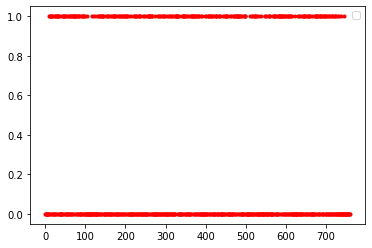

In [150]:
#plt.figure(figsize=(9, 9))
plt.plot(y_pred1,'.',color='red')
plt.legend()
plt.show

In [121]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
y_pred1=np.rint(y_pred1)
cf_matrix = confusion_matrix(y_test1, y_pred1)
print(cf_matrix)

[[473   0]
 [  0 287]]


### Predicting different Types of Noise - First Layer

In [122]:
noisy_data_first_type1=pd.read_csv("noisy_samples_first_type_first_layer.csv", header=None)
noisy_data_second_type1=pd.read_csv("noisy_samples_second_type_first_layer.csv", header=None)
noisy_data_third_type1=pd.read_csv("noisy_samples_third_type_first_layer.csv", header=None)
noisy_data_fourth_type1=pd.read_csv("noisy_samples_fourth_type_first_layer.csv", header=None)
noisy_data_first_type1 = noisy_data_first_type1.drop(columns=32)
noisy_data_second_type1 = noisy_data_second_type1.drop(columns=32)
noisy_data_third_type1 = noisy_data_third_type1.drop(columns=32)
noisy_data_fourth_type1 = noisy_data_fourth_type1.drop(columns=32)

In [151]:
pred_noisy_1 = model.predict(noisy_data_first_type1)
pred_noisy_2 = model.predict(noisy_data_second_type1)
pred_noisy_3 = model.predict(noisy_data_third_type1)
pred_noisy_4 = model.predict(noisy_data_fourth_type1)

3/3 [==============================] - 0s 4ms/step


<function matplotlib.pyplot.show(*args, **kw)>

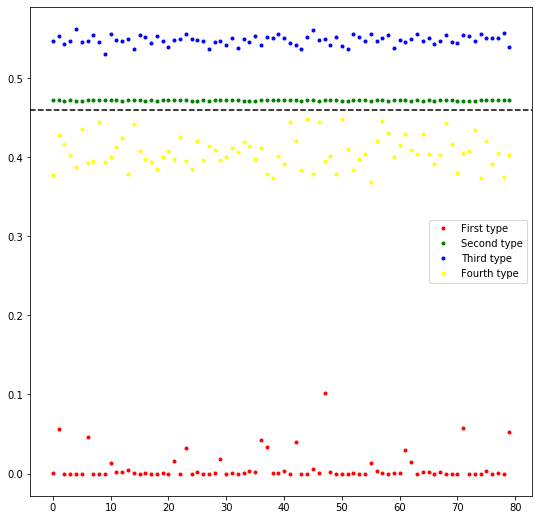

In [154]:
plt.figure(figsize=(9, 9))
plt.plot(pred_noisy_1,'.',color='red',label="First type")
plt.plot(pred_noisy_2,'.',color='green',label="Second type")
plt.plot(pred_noisy_3,'.',color='blue',label="Third type")
plt.plot(pred_noisy_4,'.',color='yellow',label="Fourth type")
plt.axhline(y=0.46, color='BLACK', linestyle='dashed')
plt.legend()
plt.show

In [155]:
pred_noisy_3=np.rint(pred_noisy_3)
y_test_noisy=np.repeat(1,80)
cf_matrix = confusion_matrix(y_test_noisy, pred_noisy_3)

In [156]:
cf_matrix  #80 True Positives for the Third Type

array([[80]])

The First Layer is predicting all the noisy data (100% True Positives) for the 2nd and 3rd type of noise and 0% of the anomalies (0% True Positives) for the 1st and 4th type of noise.

### Second layer

In [130]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
model2 = Sequential()
model2.add(Dense(X_train2.shape[0] ,input_shape=(10,), activation='relu'))
model2.add(Dropout(0.3))
#model.add(Dense(X_train1.shape[0] ,input_shape=(32,), activation='relu'))
#model.add(Dropout(0.3))
#model.add(Dense(128, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))
model2.compile(loss="binary_crossentropy", optimizer='adam',
metrics=["accuracy"])

In [131]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder().fit(y_train2)
classes = label_encoder.classes_
from sklearn.utils import compute_class_weight
classWeight = compute_class_weight('balanced',classes,y_train2) 
classWeight = dict(enumerate(classWeight))
#model.fit(X_train, y_train, batch_size = batch_size, nb_epoch = nb_epochs, show_accuracy = True, verbose = 2, validation_data = (X_test, y_test), class_weight=classWeight)

In [132]:
print("[INFO] training network...")
sgd = SGD(0.000001,decay=1e-6, momentum=0.9, nesterov=True)
#sgd = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss="binary_crossentropy", optimizer='adam',
metrics=["accuracy"])

[INFO] training network...


In [133]:
model2.fit(X_train2, y_train2, validation_data=(X_test2, y_test2),epochs=16)

Epoch 1/16
95/95 [==============================] - 1s 8ms/step - loss: 0.2714 - accuracy: 0.9263 - val_loss: 0.1864 - val_accuracy: 0.9342
Epoch 2/16
95/95 [==============================] - 1s 5ms/step - loss: 0.1953 - accuracy: 0.9293 - val_loss: 0.1888 - val_accuracy: 0.9342
Epoch 3/16
95/95 [==============================] - 1s 5ms/step - loss: 0.1941 - accuracy: 0.9293 - val_loss: 0.1846 - val_accuracy: 0.9342
Epoch 4/16
95/95 [==============================] - 1s 6ms/step - loss: 0.1937 - accuracy: 0.9293 - val_loss: 0.1845 - val_accuracy: 0.9342
Epoch 5/16
95/95 [==============================] - 1s 6ms/step - loss: 0.1946 - accuracy: 0.9293 - val_loss: 0.1856 - val_accuracy: 0.9342
Epoch 6/16
95/95 [==============================] - 0s 5ms/step - loss: 0.1962 - accuracy: 0.9293 - val_loss: 0.1843 - val_accuracy: 0.9342
Epoch 7/16
95/95 [==============================] - 1s 7ms/step - loss: 0.1941 - accuracy: 0.9293 - val_loss: 0.1839 - val_accuracy: 0.9342
Epoch 8/16
95/95 [==

In [134]:
score = model2.evaluate(X_test2, y_test2, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.18345069885253906
Test accuracy: 0.9355263113975525


In [135]:
y_pred2 = model2.predict(X_test2)
#print(classification_report(y_test.argmax(axis=1)))

24/24 [==============================] - 0s 2ms/step


No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

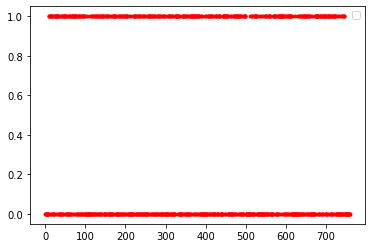

In [153]:
#plt.figure(figsize=(9, 9))
plt.plot(y_pred2,'.',color='red')
plt.legend()
plt.show

In [137]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
y_pred2=np.rint(y_pred2)
cf_matrix = confusion_matrix(y_test2, y_pred2)
print(cf_matrix) 

[[424  49]
 [  0 287]]


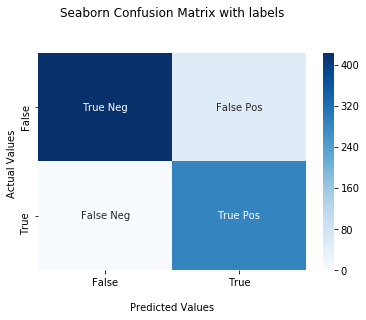

In [80]:
labels = ['True Neg','False Pos','False Neg','True Pos']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Using good  unseen data - Second Layer 

In [138]:
good_data_unseen=pd.read_csv("good_data_second_layer_10.csv", header=None)
good_data_unseen = good_data_unseen.drop(columns=10)

In [139]:
y_test_good=np.repeat(0,1600)

In [157]:
y_pred3 = model2.predict(good_data_unseen)

50/50 [==============================] - 1s 4ms/step


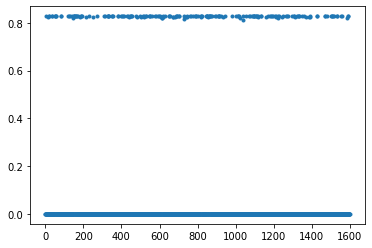

In [141]:
#plt.figure(figsize=(9, 9))
plt.plot(y_pred3,'.')

In [142]:
y_pred3=np.rint(y_pred3)

In [143]:
cf_matrix = confusion_matrix(y_test_good, y_pred3)
cf_matrix
#197 false positives.

array([[1403,  197],
       [   0,    0]])

The second layer, regarding good data, the model is predicting 88% of True Negatives and 12% False Positives.

In [172]:
## good data first layer
good_data_unseen1=pd.read_csv("good_data_first_layer_32.csv", header=None)
good_data_unseen1 = good_data_unseen1.drop(columns=32)

In [182]:
good_data_unseen1

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,9.339192,10.018954,0.000000,2.627435,6.451214,0.000000,7.543199,20.827024,22.909838,0.0,...,18.976078,0.0,0.000000,29.173704,31.379627,0.0,12.454443,16.090012,0.000000,2.254439
1,12.550483,0.000000,3.035367,5.369245,0.000000,0.609906,0.258413,10.397615,19.228085,0.0,...,0.000000,0.0,2.616300,10.812126,17.254843,0.0,6.435759,15.439883,0.000000,0.000000
2,9.242122,0.000000,1.497475,20.345980,11.161327,11.088881,0.000000,18.590588,23.979483,0.0,...,14.168651,0.0,10.227740,23.042364,16.817210,0.0,14.041547,9.885569,8.839575,0.603229
3,18.214937,1.516009,0.000000,9.282221,3.436129,9.493133,0.000000,9.826456,24.030056,0.0,...,15.151364,0.0,0.081571,12.460374,3.737251,0.0,14.423039,10.069696,0.000000,0.000000
4,24.767120,0.000000,5.218727,4.619105,0.000000,9.133290,0.000000,7.315839,32.346275,0.0,...,13.219506,0.0,0.000000,1.286303,1.929151,0.0,13.243887,15.685650,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,28.926544,0.000000,0.000000,22.711203,3.550816,24.632486,5.896880,5.514254,31.556992,0.0,...,17.589975,0.0,1.604302,22.923020,15.587934,0.0,18.459837,19.669931,0.000000,0.000000
1596,4.654681,0.000000,0.000000,0.209598,5.604252,0.000000,0.000000,6.168780,11.964777,0.0,...,14.117071,0.0,7.641332,8.810531,0.000000,0.0,9.702170,0.000000,0.000000,0.000000
1597,33.318207,0.000000,2.848253,20.914455,0.000000,18.654629,2.865959,11.913595,47.384100,0.0,...,19.176065,0.0,0.000000,6.822701,17.310982,0.0,20.392124,18.738768,0.961496,0.000000
1598,13.027037,0.000000,13.411426,0.000000,0.000000,0.000000,0.000000,3.065042,26.763588,0.0,...,10.572303,0.0,0.000000,1.962241,7.175931,0.0,1.512890,19.547436,0.000000,6.979639


In [173]:
good_data_unseen1.shape

(1600, 32)

In [174]:
y_test_good1=np.repeat(0,1600)

In [175]:
y_pred1 = model.predict(good_data_unseen1)

50/50 [==============================] - 1s 4ms/step


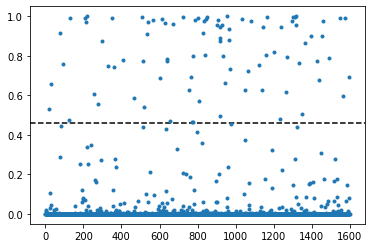

In [177]:
#plt.figure(figsize=(9, 9))
plt.axhline(y=0.46, color='BLACK', linestyle='dashed')
plt.plot(y_pred1,'.')

In [178]:
y_pred1=np.rint(y_pred1)

In [179]:
y_pred1

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [180]:
cf_matrix = confusion_matrix(y_test_good1, y_pred1)
cf_matrix

array([[1517,   83],
       [   0,    0]])

## Predicting Different Types of Noise - Second layer

In [144]:
noisy_data_first_type2=pd.read_csv("noisy_samples_first_type_second_layer.csv", header=None)
noisy_data_second_type2=pd.read_csv("noisy_samples_second_type_second_layer.csv", header=None)
noisy_data_third_type2=pd.read_csv("noisy_samples_third_type_second_layer.csv", header=None)
noisy_data_fourth_type2=pd.read_csv("noisy_samples_fourth_type_second_layer.csv", header=None)
noisy_data_first_type2 = noisy_data_first_type2.drop(columns=10)
noisy_data_second_type2 = noisy_data_second_type2.drop(columns=10)
noisy_data_third_type2 = noisy_data_third_type2.drop(columns=10)
noisy_data_fourth_type2 = noisy_data_fourth_type2.drop(columns=10)


In [181]:
noisy_data_second_type2

,0,1,2,3,4,5,6,7,8,9
0,0.111821,0.177484,0.020996,0.100483,0.045237,0.060381,0.121685,0.178637,0.121241,0.062035
1,0.111814,0.177607,0.021107,0.100516,0.045352,0.060574,0.121814,0.177930,0.121193,0.062093
2,0.111900,0.177747,0.020933,0.100526,0.045148,0.060485,0.121800,0.178155,0.121371,0.061935
3,0.111813,0.177743,0.020947,0.100507,0.045157,0.060424,0.121775,0.178252,0.121388,0.061994
4,0.111879,0.177764,0.020953,0.100473,0.045180,0.060426,0.121878,0.178268,0.121298,0.061881
...,...,...,...,...,...,...,...,...,...,...
75,0.111812,0.177611,0.021035,0.100493,0.045274,0.060458,0.121773,0.178306,0.121207,0.062032
76,0.111846,0.177617,0.020960,0.100461,0.045197,0.060362,0.121747,0.178592,0.121256,0.061962
77,0.111860,0.177765,0.020909,0.100489,0.045124,0.060383,0.121787,0.178440,0.121334,0.061910
78,0.111893,0.177661,0.020939,0.100488,0.045167,0.060415,0.121811,0.178382,0.121336,0.061908


In [145]:
pred_noisy_1_2 = model2.predict(noisy_data_first_type2)
pred_noisy_2_2 = model2.predict(noisy_data_second_type2)
pred_noisy_3_2 = model2.predict(noisy_data_third_type2)
pred_noisy_4_2 = model2.predict(noisy_data_fourth_type2)

3/3 [==============================] - 0s 6ms/step


<function matplotlib.pyplot.show(*args, **kw)>

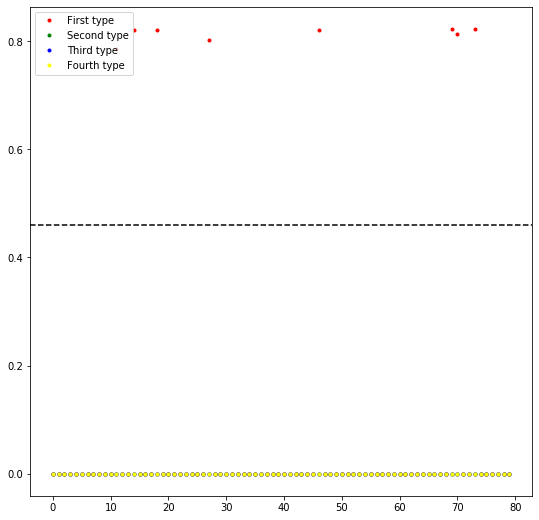

In [146]:
plt.figure(figsize=(9, 9))
plt.plot(pred_noisy_1_2,'.',color='red',label="First type")
plt.plot(pred_noisy_2_2,'.',color='green',label="Second type")
plt.plot(pred_noisy_3_2,'.',color='blue',label="Third type")
plt.plot(pred_noisy_4_2,'.',color='yellow',label="Fourth type")
plt.axhline(y=0.46, color='BLACK', linestyle='dashed')
plt.legend()
plt.show


In [147]:
## First Type of noise

In [148]:
pred_noisy_1=np.rint(pred_noisy_1_2)
y_test_good=np.repeat(1,80)
cf_matrix = confusion_matrix(y_test_good, pred_noisy_1)

In [149]:
cf_matrix #72 False Negatives, 8 True Positives

array([[ 0,  0],
       [72,  8]])

The Second  Layer is predicting 0% of the anomalies (0% True Positives) for the 2nd, 3rd and 4th type of noise. It is predicting 8% of the anomalies of the 1st type of noise.

In [ ]:
# ALL

<function matplotlib.pyplot.show(*args, **kw)>

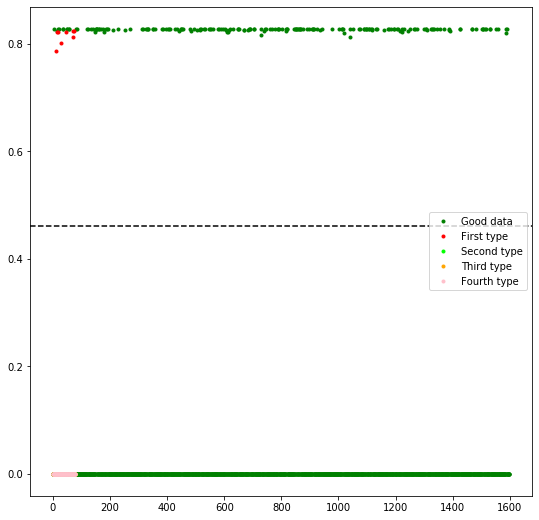

In [158]:
y_pred3
plt.figure(figsize=(9, 9))
plt.plot(y_pred3,'.',color='green',label="Good data")
plt.plot(pred_noisy_1_2,'.',color='red',label="First type")
plt.plot(pred_noisy_2_2,'.',color='lime',label="Second type")
plt.plot(pred_noisy_3_2,'.',color='orange',label="Third type")
plt.plot(pred_noisy_4_2,'.',color='pink',label="Fourth type")
plt.axhline(y=0.46, color='BLACK', linestyle='dashed')
plt.legend()
plt.show

